# Titanic Kaggle First Try
---

---
### Import Data
---

In [2]:
import numpy as np
import pandas as pd

train = pd.read_csv("./input/train.csv")
test = pd.read_csv("./input/test.csv")
test["Survived"] = None

titanic = pd.concat([train,test])



---
### Data transformation
---

In [3]:
## Transform variable and fill NAs

# Age
titanic.Age = titanic.Age.fillna(titanic.Age.median())

# Fare
titanic.Fare = titanic.Fare.fillna(titanic.Fare.median())

# Sex : male=0, female=1
titanic.loc[titanic.Sex=="male","Sex"] = 0
titanic.loc[titanic.Sex=="female","Sex"] = 1

# Embarked : if null: "S"
titanic.Embarked = titanic.Embarked.fillna("S")

# Embarked : S=1, C=2, Q=3
titanic.loc[titanic.Embarked=="S","Embarked"] = 1
titanic.loc[titanic.Embarked=="C","Embarked"] = 2
titanic.loc[titanic.Embarked=="Q","Embarked"] = 3

titanic.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
Age            1309 non-null float64
Cabin          295 non-null object
Embarked       1309 non-null object
Fare           1309 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null object
Ticket         1309 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 132.9+ KB


In [4]:
titanic.info()
titanic.head(20)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
Age            1309 non-null float64
Cabin          295 non-null object
Embarked       1309 non-null object
Fare           1309 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null object
Ticket         1309 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 132.9+ KB


,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22,NaN,1,7.2500,"Braund, Mr. Owen Harris",0,1,3,0,1,0,A/5 21171
1,38,C85,2,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,1,1,1,PC 17599
2,26,NaN,1,7.9250,"Heikkinen, Miss. Laina",0,3,3,1,0,1,STON/O2. 3101282
3,35,C123,1,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,1,1,1,113803
4,35,NaN,1,8.0500,"Allen, Mr. William Henry",0,5,3,0,0,0,373450
5,28,NaN,3,8.4583,"Moran, Mr. James",0,6,3,0,0,0,330877
6,54,E46,1,51.8625,"McCarthy, Mr. Timothy J",0,7,1,0,0,0,17463
7,2,NaN,1,21.0750,"Palsson, Master. Gosta Leonard",1,8,3,0,3,0,349909
8,27,NaN,1,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,9,3,1,0,1,347742
9,14,NaN,2,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,10,2,1,1,1,237736


---
### Data creation
---

*** From DataQuest Exercise ***
- NameLength
- Title
- FamilyId

In [5]:
### Name length ###
titanic["NameLength"] = titanic["Name"].apply(lambda x: len(x))


### Title ###
import re
# A function to get the title from a name.
def get_title(name):
    # Use a regular expression to search for a title.  Titles always consist of capital and lowercase letters, and end with a period.
    title_search = re.search(' ([A-Za-z]+)\.', name)
    # If the title exists, extract and return it.
    if title_search:
        return title_search.group(1)
    return ""

# Get all the titles and print how often each one occurs.
titles = titanic["Name"].apply(get_title)
print(pd.value_counts(titles))

# Map each title to an integer.  Some titles are very rare, and are compressed into the same codes as other titles.
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Dr": 5, "Rev": 6, "Major": 7, "Col": 7, "Mlle": 8,
                 "Mme": 8, "Don": 9, "Dona": 9, "Lady": 10, "Countess": 10, "Jonkheer": 10, "Sir": 9, "Capt": 7, "Ms": 2}
for k,v in title_mapping.items():
    titles[titles == k] = v

titanic["Title"] = titles

### FamilySize ###
titanic["FamilySize"] = titanic["SibSp"] + titanic["Parch"]

### FamilyId ###
# A function to get the id given a row
import operator
family_id_mapping={}
def get_family_id(row):
    # Find the last name by splitting on a comma
    last_name = row["Name"].split(",")[0]
    # Create the family id
    family_id = "{0}{1}".format(last_name, row["FamilySize"])
    # Look up the id in the mapping
    if family_id not in family_id_mapping:
        if len(family_id_mapping) == 0:
            current_id = 1
        else:
            # Get the maximum id from the mapping and add one to it if we don't have an id
            current_id = (max(family_id_mapping.items(), key=operator.itemgetter(1))[1] + 1)
        family_id_mapping[family_id] = current_id
    return family_id_mapping[family_id]

# Get the family ids with the apply method
family_ids = titanic.apply(get_family_id, axis=1)

# print(pandas.value_counts(family_ids))

# There are a lot of family ids, so we'll compress all of the families under 3 members into one code.
#family_ids[titanic["FamilySize"] < 3] = -1
titanic["FamilyId"] = family_ids




Mr          757
Miss        260
Mrs         197
Master       61
Dr            8
Rev           8
Col           4
Major         2
Mlle          2
Ms            2
Don           1
Capt          1
Lady          1
Sir           1
Countess      1
Jonkheer      1
Dona          1
Mme           1
Name: Name, dtype: int64


---
*** My variables ***

In [6]:
p = re.compile('[A-Ga-g]')
titanic.loc[pd.notnull(titanic["Cabin"]),"Deck"] = titanic.loc[pd.notnull(titanic["Cabin"]),"Cabin"].apply(
        lambda x: p.search(x).group() if p.search(x)>0  else ""
        )
titanic.loc[pd.isnull(titanic["Deck"]),"Deck"]=""
di = {"":0,"G":1,"F":2,"E":3,"D":4,"C":5,"B":6,"A":7}
titanic.Deck.replace(di,inplace=True)

titanic["NbSameTicket"]=titanic.groupby(["Ticket"])["PassengerId"].transform('count')

titanic.loc[(titanic["Age"]>18) & (titanic["Parch"]>0),"IsParent"] = 1
titanic.loc[(titanic["Age"]<=18) | (titanic["Parch"]==0),"IsParent"] = 0

titanic.loc[(titanic["Age"]>18) | (titanic["Parch"]==0),"IsChild"] = 0
titanic.loc[(titanic["Age"]<=18) & (titanic["Parch"]>0),"IsChild"] = 1

titanic["FamHasChilds"] = titanic.groupby(["FamilyId"])["IsChild"].transform("sum")
titanic["FamHasParents"] = titanic.groupby(["FamilyId"])["IsParent"].transform("sum")

titanic["TickHasChilds"] = titanic.groupby(["Ticket"])["IsChild"].transform("sum")
titanic["TickHasParents"] = titanic.groupby(["Ticket"])["IsParent"].transform("sum")

titanic.loc[(titanic["Age"]>18) & (titanic["SibSp"]>0) & (titanic["Sex"]==0),"HasSpouse"] = 1
titanic.loc[(titanic["Age"]<=18) | (titanic["SibSp"]==0) | (titanic["Sex"]==1),"HasSpouse"] = 0

titanic.loc[(titanic["Age"]>18) & (titanic["SibSp"]>0) & (titanic["Sex"]==1),"HasHusb"] = 1
titanic.loc[(titanic["Age"]<=18) | (titanic["SibSp"]==0) | (titanic["Sex"]==0),"HasHusb"] = 0

titanic.loc[(titanic["IsParent"]>0) & (titanic["Sex"]==1),"IsMother"] = 1
titanic.loc[(titanic["IsParent"]<1) | (titanic["Sex"]==0),"IsMother"] = 0

titanic.loc[(titanic["IsParent"]>0) & (titanic["Sex"]==0),"IsFather"] = 1
titanic.loc[(titanic["IsParent"]<1) | (titanic["Sex"]==1),"IsFather"] = 0

print(titanic.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 28 columns):
Age               1309 non-null float64
Cabin             295 non-null object
Embarked          1309 non-null object
Fare              1309 non-null float64
Name              1309 non-null object
Parch             1309 non-null int64
PassengerId       1309 non-null int64
Pclass            1309 non-null int64
Sex               1309 non-null object
SibSp             1309 non-null int64
Survived          891 non-null object
Ticket            1309 non-null object
NameLength        1309 non-null int64
Title             1309 non-null object
FamilySize        1309 non-null int64
FamilyId          1309 non-null int64
Deck              1309 non-null int64
NbSameTicket      1309 non-null int64
IsParent          1309 non-null float64
IsChild           1309 non-null float64
FamHasChilds      1309 non-null float64
FamHasParents     1309 non-null float64
TickHasChilds     1309 non-null float64
T

*** Some transformed variables have to be in numeric ***

In [7]:
titanic.Embarked = titanic.Embarked.astype(float)
titanic.Sex = titanic.Sex.astype(float)
titanic.Survived = titanic.Survived.astype(float)
titanic.Title = titanic.Title.astype(float)
titanic.Deck = titanic.Deck.astype(float)


---
### Split the whole modified dataset in train and test
---

In [8]:
train_new = titanic[0:891]
test_new = titanic[891:]

---
### Machine learning
---

In [9]:
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import KFold
from sklearn.cross_validation import ShuffleSplit

from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

import matplotlib.pyplot as plt
%matplotlib inline


#### Important Variables

[  2.53704739e-25   1.40606613e-69   5.27606885e-02   2.92243929e-01
   1.47992454e-02   6.12018934e-15   1.40831242e-03   6.19891122e-01
   5.25716210e-02   1.03899613e-27   5.94146032e-01   2.32199808e-02
   2.65114038e-04   5.68911625e-01   5.59574799e-01   1.42428024e-04
   9.55713310e-15   5.95055559e-08   1.44582767e-03   2.51899527e-19
   2.02679507e-24]


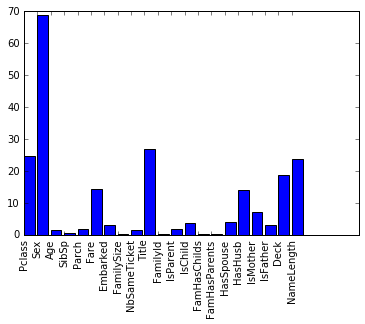

In [11]:
predictors = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked", "FamilySize", "NbSameTicket", "Title", "FamilyId",
              "IsParent", "IsChild", "FamHasChilds", "FamHasParents", "HasSpouse", "HasHusb", "IsMother", "IsFather","Deck","NameLength"]

# Perform feature selection
selector = SelectKBest(f_classif, k=5)
selector.fit(train_new[predictors], train_new["Survived"])

# Get the raw p-values for each feature, and transform from p-values into scores
print(selector.pvalues_)
scores = -np.log10(selector.pvalues_)

# Plot the scores.
plt.bar(range(len(predictors)), scores)
plt.xticks(range(len(predictors)), predictors, rotation='vertical')
plt.show()


#### Linear Regression

In [12]:
# Pick some features.
predictors = ["Pclass", "Sex", "Age", "Fare", "FamilySize", "Title","IsParent","IsChild","HasSpouse","HasHusb",
              "IsMother", "IsFather", "Deck"]

alg = LinearRegression()
score = cross_val_score(alg, train_new[predictors],train_new["Survived"],cv=3)
print(score)
print(score.mean())


[ 0.33936913  0.40867813  0.44388455]
0.397310602862


#### Logistic Regression

In [16]:
# Pick some features.
predictors = ["Pclass", "Sex", "Age", "Fare", "FamilySize", "Title","IsParent","IsChild","HasSpouse","HasHusb",
              "IsMother", "IsFather", "Deck","Embarked","NameLength"]

alg = LogisticRegression(random_state=1)
score = cross_val_score(alg, train_new[predictors],train_new["Survived"],cv=3)
print(score)
print(score.mean())


[ 0.80808081  0.81144781  0.82154882]
0.813692480359


#### RandomForest

In [41]:
# Pick some features.
predictors = ["Pclass", "Sex", "Fare", "Title"]

alg = RandomForestClassifier(random_state=1, n_estimators=150, min_samples_split=8, min_samples_leaf=4)
score = cross_val_score(alg, train_new[predictors],train_new["Survived"],cv=3)
print(score.mean())

# Test.
predictors = ["Pclass", "Sex", "Fare", "Title","IsParent","IsChild","HasSpouse","HasHusb","IsMother","IsFather"]

alg = RandomForestClassifier(random_state=1, n_estimators=150, min_samples_split=8, min_samples_leaf=4)
score = cross_val_score(alg, train_new[predictors],train_new["Survived"],cv=3)
print(score.mean())

# Test.
predictors = ["Pclass", "Sex", "Age", "Fare", "Title","IsParent","IsChild","HasSpouse","HasHusb","IsMother","IsFather"]

alg = RandomForestClassifier(random_state=1, n_estimators=150, min_samples_split=8, min_samples_leaf=4)
score = cross_val_score(alg, train_new[predictors],train_new["Survived"],cv=3)
print(score.mean())

# Test.
predictors = ["Pclass", "Sex", "Age", "Fare", "FamilySize", "Title","IsParent","IsChild","HasSpouse","HasHusb",
              "IsMother","IsFather"]

alg = RandomForestClassifier(random_state=1, n_estimators=150, min_samples_split=8, min_samples_leaf=4)
score = cross_val_score(alg, train_new[predictors],train_new["Survived"],cv=3)
print(score.mean())

# Test.
predictors = ["Pclass", "Sex", "Age", "Fare", "FamilySize", "Title", "Deck", "FamilyId"]

alg = RandomForestClassifier(random_state=1, n_estimators=150, min_samples_split=8, min_samples_leaf=4)
score = cross_val_score(alg, train_new[predictors],train_new["Survived"],cv=3)
print(score.mean())

# Test.
predictors = ["Pclass", "Sex", "Age", "Fare", "FamilySize", "Title", "Deck"]

alg = RandomForestClassifier(random_state=1, n_estimators=150, min_samples_split=8, min_samples_leaf=4)
score = cross_val_score(alg, train_new[predictors],train_new["Survived"],cv=3)
print(score)
print(score.mean())

# Test.
predictors = ["Pclass", "Sex", "Age", "Fare", "FamilySize", "Title", "Deck"]

alg = RandomForestClassifier(random_state=1, n_estimators=150, min_samples_split=8, min_samples_leaf=4)
score = cross_val_score(alg, train_new[predictors],train_new["Survived"],cv=4)
print(score)
print(score.mean())


# Test ShuffleSplit, 10 iterations, test size=30%.
predictors = ["Pclass", "Sex", "Age", "Fare", "FamilySize", "Title", "Deck"]

alg = RandomForestClassifier(random_state=1, n_estimators=150, min_samples_split=8, min_samples_leaf=4)
cv = ShuffleSplit(train_new.shape[0], n_iter=10,test_size=0.3, random_state=0)                                                  
score = cross_val_score(alg, train_new[predictors],train_new["Survived"],cv=cv)
print(score)
print(score.mean())

# Test ShuffleSplit, 20 iterations, test size=20%.
predictors = ["Pclass", "Sex", "Age", "Fare", "FamilySize", "Title", "Deck"]

alg = RandomForestClassifier(random_state=1, n_estimators=150, min_samples_split=8, min_samples_leaf=4)
cv = ShuffleSplit(train_new.shape[0], n_iter=20,test_size=0.2, random_state=0)                                                  
score = cross_val_score(alg, train_new[predictors],train_new["Survived"],cv=cv)
print(sorted(score))
print(score.mean())

# Test ShuffleSplit, 20 iterations, test size=10%.
predictors = ["Pclass", "Sex", "Age", "Fare", "FamilySize", "Title", "Deck"]

alg = RandomForestClassifier(random_state=1, n_estimators=150, min_samples_split=8, min_samples_leaf=4)
cv = ShuffleSplit(train_new.shape[0], n_iter=20,test_size=0.1, random_state=0)                                                  
score = cross_val_score(alg, train_new[predictors],train_new["Survived"],cv=cv)
print(sorted(score))
print(score.mean())



0.811447811448
0.818181818182
0.822671156004
0.830527497194
0.827160493827
[ 0.80808081  0.85521886  0.84175084]
0.835016835017
[ 0.80357143  0.86098655  0.82432432  0.85135135]
0.835058412833
[ 0.8358209   0.80223881  0.84328358  0.82462687  0.8358209   0.8358209
  0.81343284  0.82462687  0.85820896  0.87313433]
0.834701492537
[0.78212290502793291, 0.78770949720670391, 0.81005586592178769, 0.81564245810055869, 0.81564245810055869, 0.82681564245810057, 0.82681564245810057, 0.83240223463687146, 0.83798882681564246, 0.83798882681564246, 0.84357541899441346, 0.84357541899441346, 0.84916201117318435, 0.86033519553072624, 0.86592178770949724, 0.87709497206703912, 0.88268156424581001, 0.88826815642458101, 0.88826815642458101, 0.91061452513966479]
0.844134078212
[0.78888888888888886, 0.80000000000000004, 0.80000000000000004, 0.82222222222222219, 0.82222222222222219, 0.82222222222222219, 0.83333333333333337, 0.83333333333333337, 0.84444444444444444, 0.84444444444444444, 0.84444444444444444, 0.

#### GradientBoosting

In [20]:
# Test.
predictors = ["Pclass", "Sex", "Age", "Fare", "FamilySize", "Title","IsParent","IsChild","HasSpouse","HasHusb",
              "IsMother","IsFather"]

alg=GradientBoostingClassifier(random_state=1, n_estimators=25, max_depth=4)
score = cross_val_score(alg, train_new[predictors],train_new["Survived"],cv=3)
print(score.mean())


# Test.
predictors = ["Pclass", "Sex", "Fare", "FamilySize", "Title"]

alg=GradientBoostingClassifier(random_state=1, n_estimators=25, max_depth=4)
score = cross_val_score(alg, train_new[predictors],train_new["Survived"],cv=3)
print(score.mean())

# Test.
predictors = ["Pclass", "Sex", "Age","FamilySize", "Title"]

alg=GradientBoostingClassifier(random_state=1, n_estimators=25, max_depth=4)
score = cross_val_score(alg, train_new[predictors],train_new["Survived"],cv=3)
print(score.mean())

# Test.
predictors = ["Pclass", "Sex", "Age","Fare", "Title"]

alg=GradientBoostingClassifier(random_state=1, n_estimators=25, max_depth=4)
score = cross_val_score(alg, train_new[predictors],train_new["Survived"],cv=3)
print(score)
print(score.mean())

# Test.
predictors = ["Pclass", "Sex", "Age", "Fare", "FamilySize", "Title","IsParent","IsChild","HasSpouse","HasHusb",
              "IsMother","IsFather","Deck"]

alg=GradientBoostingClassifier(random_state=1, n_estimators=25, max_depth=4)
score = cross_val_score(alg, train_new[predictors],train_new["Survived"],cv=3)
print(score)
print(score.mean())


# Test ShuffleSplit.
predictors = ["Pclass", "Sex", "Age", "Fare", "FamilySize", "Title","IsParent","IsChild","HasSpouse","HasHusb",
              "IsMother","IsFather","Deck"]

alg=GradientBoostingClassifier(random_state=1, n_estimators=25, max_depth=4)
cv = ShuffleSplit(train_new.shape[0], n_iter=20,test_size=0.3, random_state=0)                                                  
score = cross_val_score(alg, train_new[predictors],train_new["Survived"],cv=cv)
print(score)
print(score.mean())


# Test ShuffleSplit.
predictors = ["Pclass", "Sex", "Age", "Fare", "FamilySize", "Title","IsParent","IsChild","HasSpouse","HasHusb",
              "IsMother","IsFather","Deck"]

alg=GradientBoostingClassifier(random_state=1, n_estimators=25, max_depth=4)
cv = ShuffleSplit(train_new.shape[0], n_iter=20,test_size=0.2, random_state=0)                                                  
score = cross_val_score(alg, train_new[predictors],train_new["Survived"],cv=cv)
print(score)
print(score.mean())




0.828282828283
0.830527497194
0.830527497194
[ 0.80808081  0.85858586  0.82491582]
0.830527497194
[ 0.8047138   0.85185185  0.83838384]
0.83164983165
[ 0.82089552  0.81716418  0.8358209   0.81716418  0.8358209   0.79477612
  0.80223881  0.8358209   0.85820896  0.85820896  0.84701493  0.82462687
  0.79104478  0.87313433  0.82835821  0.82835821  0.80597015  0.85447761
  0.87686567  0.85820896]
0.833208955224
[ 0.81005587  0.80446927  0.82681564  0.81564246  0.84916201  0.84916201
  0.82122905  0.8603352   0.88268156  0.88268156  0.8603352   0.84916201
  0.81564246  0.87709497  0.81005587  0.83798883  0.7877095   0.87709497
  0.87709497  0.84357542]
0.841899441341


---
#### Ensemble Tests ####
---

In [26]:
# The algorithms we want to ensemble.
# We're using the more linear predictors for the logistic regression, and everything with the gradient boosting classifier.
algorithms = [
        [GradientBoostingClassifier(random_state=1, n_estimators=25, max_depth=3), ["Pclass", "Sex", "Age", "Fare", "FamilySize", "Title","IsParent","IsChild","HasSpouse","HasHusb",
                  "IsMother","IsFather","Deck"]],
        [LogisticRegression(random_state=1), ["Pclass", "Sex", "Age", "Fare", "FamilySize", "Title","IsParent","IsChild","HasSpouse","HasHusb",
                  "IsMother", "IsFather", "Deck","Embarked","NameLength"]]
    ]

# Initialize the cross validation folds
kf = KFold(train_new.shape[0], n_folds=3, random_state=1)

predictions = []
for train, test in kf:
    train_target = train_new["Survived"].iloc[train]
    full_test_predictions = []
    # Make predictions for each algorithm on each fold
    for alg, predictors in algorithms:
        # Fit the algorithm on the training data.
        alg.fit(train_new[predictors].iloc[train,:], train_target)
        # Select and predict on the test fold.  
        # The .astype(float) is necessary to convert the dataframe to all floats and avoid an sklearn error.
        test_predictions = alg.predict_proba(train_new[predictors].iloc[test,:].astype(float))[:,1]
        full_test_predictions.append(test_predictions)
    # Use a simple ensembling scheme -- just average the predictions to get the final classification.
    test_predictions = (full_test_predictions[0] + full_test_predictions[1]) / 2
    # Any value over .5 is assumed to be a 1 prediction, and below .5 is a 0 prediction.
    test_predictions[test_predictions <= .5] = 0
    test_predictions[test_predictions > .5] = 1
    predictions.append(test_predictions)

# Put all the predictions together into one array.
predictions = np.concatenate(predictions, axis=0)

# Compute accuracy by comparing to the training data.
accuracy = sum(predictions[predictions == train_new["Survived"]]) / len(predictions)
print(accuracy)

0.824915824916


C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:36: FutureWarning: in the future, boolean array-likes will be handled as a boolean array index


In [32]:
# The algorithms we want to ensemble.
# We're using the more linear predictors for the logistic regression, and everything with the gradient boosting classifier.
algorithms = [
        [GradientBoostingClassifier(random_state=1, n_estimators=25, max_depth=3), ["Pclass", "Sex", "Age", "Fare", "FamilySize", "Title","IsParent","IsChild","HasSpouse","HasHusb",
                  "IsMother","IsFather","Deck"]],
        [RandomForestClassifier(random_state=1, n_estimators=150, min_samples_split=8, min_samples_leaf=4),
                 ["Pclass", "Sex", "Age", "Fare", "FamilySize", "Title", "Deck"]]
    ]

# Initialize the cross validation folds
kf = KFold(train_new.shape[0], n_folds=3, random_state=1)

predictions = []
for train, test in kf:
    train_target = train_new["Survived"].iloc[train]
    full_test_predictions = []
    # Make predictions for each algorithm on each fold
    for alg, predictors in algorithms:
        # Fit the algorithm on the training data.
        alg.fit(train_new[predictors].iloc[train,:], train_target)
        # Select and predict on the test fold.  
        # The .astype(float) is necessary to convert the dataframe to all floats and avoid an sklearn error.
        test_predictions = alg.predict_proba(train_new[predictors].iloc[test,:].astype(float))[:,1]
        full_test_predictions.append(test_predictions)
    # Use a simple ensembling scheme -- just average the predictions to get the final classification.
    test_predictions = (full_test_predictions[0] + full_test_predictions[1]) / 2
    # Any value over .5 is assumed to be a 1 prediction, and below .5 is a 0 prediction.
    test_predictions[test_predictions <= .5] = 0
    test_predictions[test_predictions > .5] = 1
    predictions.append(test_predictions)

# Put all the predictions together into one array.
predictions = np.concatenate(predictions, axis=0)

# Compute accuracy by comparing to the training data.
accuracy = sum(predictions[predictions == train_new["Survived"]]) / len(predictions)
print(accuracy)

0.836139169473


C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:36: FutureWarning: in the future, boolean array-likes will be handled as a boolean array index


---
### Predict on Test_new
---

In [40]:
algorithms = [
        [GradientBoostingClassifier(random_state=1, n_estimators=25, max_depth=3), ["Pclass", "Sex", "Age", "Fare", "FamilySize", "Title","IsParent","IsChild","HasSpouse","HasHusb",
                  "IsMother","IsFather","Deck"]],
        [RandomForestClassifier(random_state=1, n_estimators=150, min_samples_split=8, min_samples_leaf=4),
                 ["Pclass", "Sex", "Age", "Fare", "FamilySize", "Title", "Deck"]]
    ]

full_predictions = []
for alg, predictors in algorithms:
    # Fit the algorithm using the full training data.
    alg.fit(train_new[predictors], train_new["Survived"])
    # Predict using the test dataset.  We have to convert all the columns to floats to avoid an error.
    predictions = alg.predict_proba(test_new[predictors].astype(float))[:,1]
    full_predictions.append(predictions)

# Mean of both alg predictions
predictions = (full_predictions[0] + full_predictions[1]) / 2
predictions[predictions<=0.5]=0
predictions[predictions>0.5]=1
predictions = predictions.astype(int)
submission = pd.DataFrame({
        "PassengerId": test_new["PassengerId"],
        "Survived": predictions
    })
print(submission.head(10))



   PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         0
4          896         1
5          897         0
6          898         1
7          899         0
8          900         1
9          901         0


---
### Submit predictions !
---

In [41]:
submission.to_csv("kaggle.csv", index=False)